In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# There is another thing

So before, we took the percentiles of the 1 sigma width interval which characterizes how the velocity dispersion uncertainty is distributed when we repeat the procedure. The velocity dispersion uncertainty there is describing the range of velocity dispersions that fit the data well.

However, we also saw that there was a spread of the best fit values around (a nominal true) value. What is the significance of this spread?

[8.724093 9.103    9.375662]
0.37890700000000166 0.2726619999999986


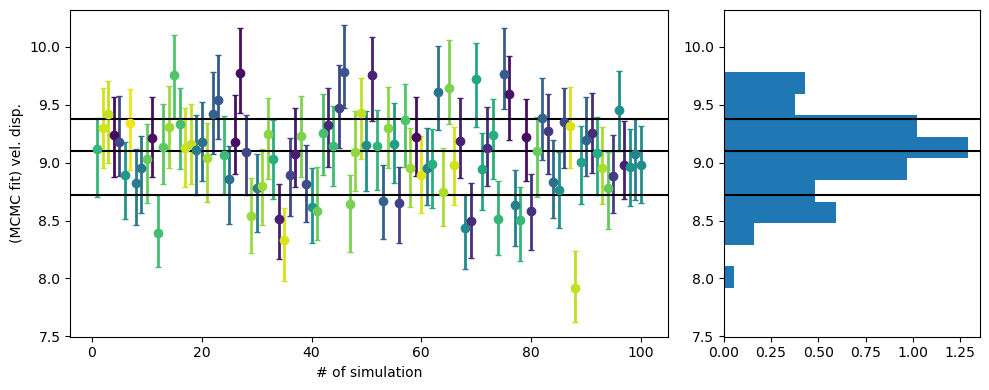

[0.409 0.349 0.421 0.365 0.293 0.378 0.405 0.357 0.39  0.381 0.342 0.291
 0.312 0.349 0.367 0.39  0.343 0.346 0.388 0.342 0.379 0.34  0.331 0.337
 0.394 0.279 0.346 0.367 0.315 0.372 0.335 0.392 0.341 0.342 0.359 0.359
 0.279 0.353 0.329 0.306 0.254 0.36  0.368 0.347 0.343 0.313 0.413 0.338
 0.394 0.392 0.393 0.379 0.331 0.346 0.336 0.338 0.405 0.332 0.337 0.329
 0.326 0.376 0.329 0.293 0.312 0.348 0.316 0.353 0.326 0.415 0.348 0.33
 0.378 0.306 0.303 0.4   0.349 0.354 0.383 0.333 0.397 0.367 0.376 0.313
 0.331 0.391 0.366 0.295 0.364 0.309 0.347 0.368 0.307 0.361 0.316 0.358
 0.297 0.344 0.394 0.328]
[0.27  0.344 0.29  0.325 0.397 0.285 0.291 0.297 0.277 0.303 0.349 0.334
 0.373 0.356 0.349 0.31  0.347 0.343 0.31  0.345 0.302 0.363 0.389 0.33
 0.281 0.402 0.384 0.323 0.329 0.298 0.317 0.305 0.34  0.303 0.276 0.317
 0.403 0.349 0.331 0.337 0.38  0.333 0.317 0.343 0.37  0.409 0.247 0.353
 0.307 0.293 0.333 0.309 0.313 0.357 0.349 0.318 0.307 0.346 0.346 0.337
 0.344 0.302 0.394 0.379 0.

In [3]:
no=4
sigfile=np.loadtxt(f"dracotest/dracotest_1.0_IMACS_{no}.txt").T

# median sig # low sig # upper sigma # nstars # observing time
#    0       #.  1.    #.   2.       #. 3.    #.   4

med_sig=sigfile[0]
upp_sig=sigfile[0]-sigfile[1]
low_sig=sigfile[2]-sigfile[0]


f,ax=plt.subplots(1,2,width_ratios=[7, 3],figsize=(10,4))

a=ax[0]
ine=range(len(sigfile[0]))
colors=plt.get_cmap('viridis')
ran=colors(np.random.rand(len(sigfile[0])))
for c in ine:
    a.errorbar([c+1],[med_sig[c]],yerr=[ [low_sig[c]] ,[upp_sig[c]] ],marker='o',linewidth=0,elinewidth=2,color=ran[c],capsize=2)
a.set_xlabel('# of simulation')
a.set_ylabel('(MCMC fit) vel. disp.')

a2=ax[1]


a2.hist(med_sig,density=True,orientation="horizontal")
a2.errorbar(np.zeros(len(med_sig)),med_sig,yerr=[low_sig,upp_sig],alpha=0)
#a2.set_xlabel('1 sigma interval')
linez=np.percentile(med_sig,[15.9,50,84.1])
for l in linez:
    a2.axhline(l,color='black')
    a.axhline(l,color='black')
print(linez)
print(linez[1]-linez[0],linez[2]-linez[1])
plt.tight_layout()
plt.show()
print(low_sig)
print(upp_sig)

There is some true value of the velocity dispersion that could be calculated by taking the velocity frequency distribution at all radii, average it over all radii by weighting with the star number density to get a total velocity frequency distribution, then taking the velocity dispersion of that. This true velocity dispersion is purely a function of the dark matter halo structure, which is fixed in our model, and the distribution of the stars, which is generated every time the galaxy is "observed," but is selected from an unchanging, underlying distribution. 

This spread in best fit values represents how the act of instantiating and observing a galaxy leads to an deviation of the observed velocity dispersion from the true velocity dispersion.

How does this interact with the uncertainty from each fitting? If our observed velocity is bigger than the "true" velocity dispersion, but the fit has an asymmetric uncertainty that is larger downwards than it is upwards, then it would seem that that fitting leans towards recovering the "true" value, and the final uncertainty is generally just whichever effect is bigger. On the other hand, if the fit is larger upwards as well, then it would seem that the uncertainties compound.

I will test this by taking the upper uncertainty - lower uncertainty difference, and seeing if that is correlated with the deviation of the best fit value from the median (indicator of 'true' value):

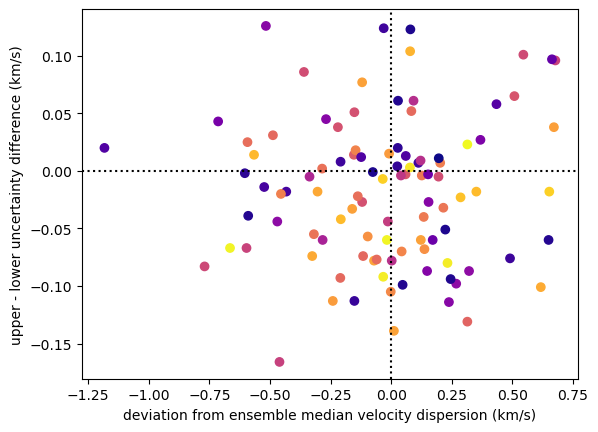

In [11]:
sub_sig=upp_sig-low_sig
dir_sig=med_sig-np.median(med_sig)

f,a=plt.subplots()
a.axhline(0,linestyle='dotted',color='black')
a.axvline(0,linestyle='dotted',color='black')
a.scatter(dir_sig,sub_sig,marker='o',cmap='plasma',c=np.random.rand(len(dir_sig)))

a.set_xlabel('deviation from ensemble median velocity dispersion (km/s)')
a.set_ylabel('upper - lower uncertainty difference (km/s)')
plt.show()


And I'll calculate Pearson's correlation constant after the definition in the book

In [9]:
ss=np.mean(sub_sig)
ds=np.mean(dir_sig)

r=np.sum( (sub_sig-ss)*(dir_sig-ds))/( np.sqrt(np.sum( (sub_sig-ss)**2)*np.sum( (dir_sig-ds)**2 )))

print('r=',r)

pr,p_value=st.pearsonr(sub_sig,dir_sig)
print(pr,p_value)

r= 0.04411052690087742
0.04411052690087741 0.6630023830883919
1.0 0.0


This is statistically insignificant so we interpret these uncertainties as uncorrelated, so the uncertainty of fitting and the uncertainty of observation are not specifically constructively or destructively interfering with each other. Then we would just combine the errors by adding them in quadrature, like we would for independent, unrelated errors.

Chihway please tell me if this analysis seems correct. Am I cooking or am i just on too little sleep?

# Characterizing the Observation Uncertainty

So for this ensemble where we used 300 stars observed each for 4 hours, we have an ensemble spread of ~.4. This is about consistent with the fitting errors, but as discussed, is a separate phenomenon. Then

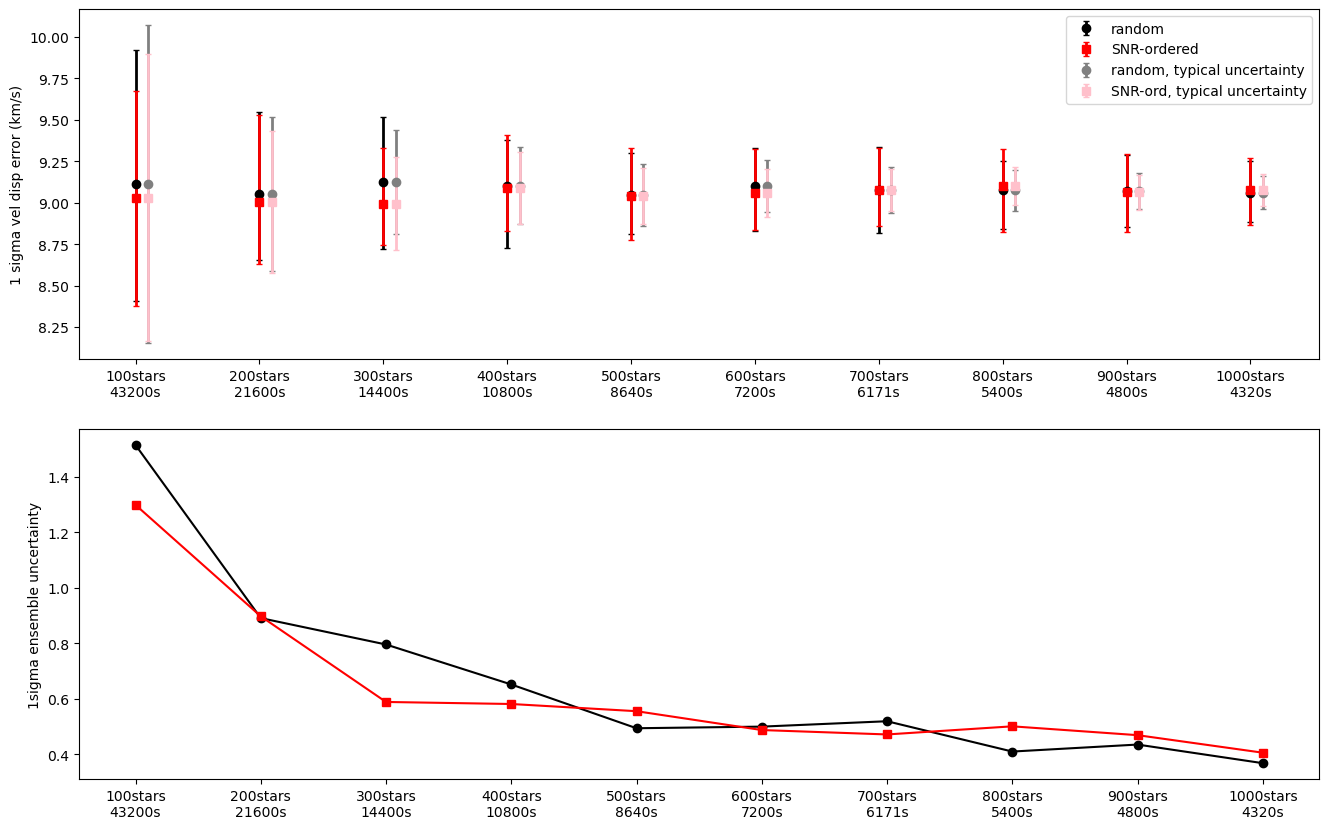

In [93]:
median=[]
lowers=[]
uppers=[]

medians=[]
lowerss=[]
upperss=[]

typic=[]
typics=[]
nframes=[1,2,3,4,5,6,7,8,9,10]

for no in nframes:
    sigfile=np.loadtxt(f"dracotest/dracotest_1.0_IMACS_{no}.txt").T

    med_sig=sigfile[0]
    upp_sig=sigfile[0]-sigfile[1]
    low_sig=sigfile[2]-sigfile[0]

    linez=np.percentile(med_sig,[15.9,50,84.1])
    median.append(linez[1])
    lowers.append(linez[1]-linez[0])
    uppers.append(linez[2]-linez[1])
    typic.append(np.mean(np.mean(upp_sig**2+low_sig**2) ))
    
    sigfiles=np.loadtxt(f"dracotest/dracotest_1.0_IMACS_{no}s.txt").T

    med_sigs=sigfiles[0]
    upp_sigs=sigfiles[0]-sigfiles[1]
    low_sigs=sigfiles[2]-sigfiles[0]


    linezs=np.percentile(med_sigs,[15.9,50,84.1])
    medians.append(linezs[1])
    lowerss.append(linezs[1]-linezs[0])
    upperss.append(linezs[2]-linezs[1])
    typics.append(np.mean(np.mean(upp_sigs**2+low_sigs**2) ))

f,az=plt.subplots(2,figsize=(16,10))
a=az[0]
tottime=12*3600

a.set_xticks(nframes)
#a.axhline(0,linestyle='dotted',color='black')
#a.fill_between(nframes,[0 for i in sg_lwe],sg_sigdif,alpha=0.5)
a.errorbar(nframes,median,yerr=[lowers,uppers],marker='o',color='black',linewidth=0,elinewidth=2,capsize=2,label='random')
a.errorbar(nframes,medians,yerr=[lowerss,upperss],marker='s',color='red',linewidth=0,elinewidth=2,capsize=2,label='SNR-ordered')

typ=[n+0.1 for n in nframes]
a.errorbar(typ,median,yerr=typic,marker='o',color='grey',linewidth=0,elinewidth=2,capsize=2,label='random, typical uncertainty')
a.errorbar(typ,medians,yerr=typics,marker='s',color='pink',linewidth=0,elinewidth=2,capsize=2,label='SNR-ord, typical uncertainty')


#a.fill_between(nframes,[-i for i in sg_lwe],sg_upe,alpha=0.5)
a.set_ylabel("1 sigma vel disp error (km/s)")
a.set_xticklabels([f"{(j+1)*100}stars\n{tottime/nframes[j]:.0f}s" for j in range(len(nframes))])

a2=az[1]
a2.plot(nframes,[(lowers[i]+uppers[i]) for i in range(len(lowers))],marker='o',color='black')
a2.plot(nframes,[(lowerss[i]+upperss[i]) for i in range(len(lowerss))],marker='s',color='red')
a2.set_xticks(nframes)
a2.set_xticklabels([f"{nframes[j]*100}stars\n{tottime/nframes[j]:.0f}s" for j in range(len(nframes))])
a2.set_ylabel('1sigma ensemble uncertainty')
a.legend()
plt.show()

It looks like the uncertainty of the fitting over the ensemble appears to decrease towards larger numbers of observations. Also it would seem that the ensemble uncertainty starts our smaller than the typical uncertainty, but for the largest number of stars, the ensemble uncertainty is larger than the typical fitting uncertainty.

# Jackknifing the data to get uncertainties on the ensemble

In [97]:
def make_1sig(sample):
    linezs=np.percentile(sample,[15.9,84.1])
    return linezs[1]-linezs[0]

def jacknife_1sig(sample):
    # sample is a list
    
    samp=np.array(sample)

    N=len(samp)

    aN=make_1sig(samp)
    ai=np.array([make_1sig(samp[np.array(range(N))!=w]) for w in range(N)])
    
    #print( (mask*samp)[0])
    bias=(N-1)*(aN-np.mean(ai))
    aJ=aN+bias
    
    uncert=(N*aN-aJ-(N-1)*ai)**2
    uncert=np.sqrt(np.mean(uncert)/(N-1))
    
    #print(aJ,uncert)
    #print(bias,aN,np.mean(ai),ai)
    
    return aJ,uncert

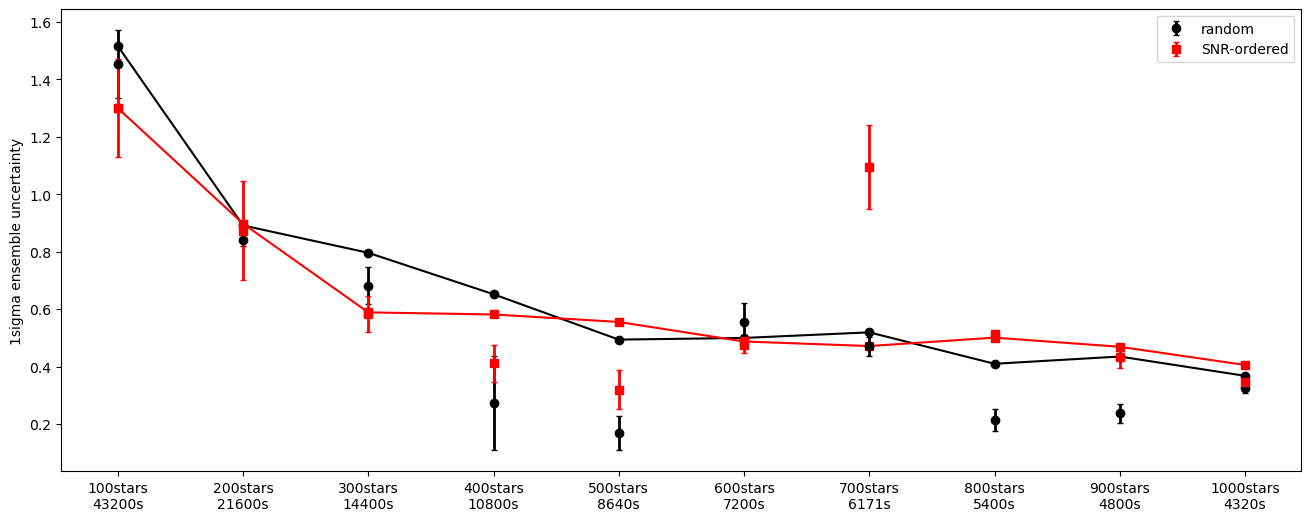

In [98]:
f,a2=plt.subplots(1,figsize=(16,6))
tottime=12*3600

uncert=[]
uncerts=[]

unun=[]
ununs=[]

for no in nframes:
    sigfile=np.loadtxt(f"dracotest/dracotest_1.0_IMACS_{no}.txt").T

    med_sig=sigfile[0]
    a,b=jacknife_1sig(med_sig)
    uncert.append(a)
    unun.append(b)

    
    sigfiles=np.loadtxt(f"dracotest/dracotest_1.0_IMACS_{no}s.txt").T
    med_sigs=sigfiles[0]

    a,b=jacknife_1sig(med_sigs)
    uncerts.append(a)
    ununs.append(b)
    
a2.errorbar(nframes,uncert,yerr=unun,marker='o',color='black',linewidth=0,elinewidth=2,capsize=2,label='random')
a2.errorbar(nframes,uncerts,yerr=ununs,marker='s',color='red',linewidth=0,elinewidth=2,capsize=2,label='SNR-ordered')

a2.plot(nframes,[(lowers[i]+uppers[i]) for i in range(len(lowers))],marker='o',color='black')
a2.plot(nframes,[(lowerss[i]+upperss[i]) for i in range(len(lowerss))],marker='s',color='red')

a2.set_xticks(nframes)
a2.set_xticklabels([f"{(j+1)*100}stars\n{tottime/nframes[j]:.0f}s" for j in range(len(nframes))])
a2.set_ylabel('1sigma ensemble uncertainty')
a2.legend()
plt.show()

Apparently the Jackknife Method is "well known" to poorly approximate sample statistics based on quantiles, which is what this is. So that would explain why the bias correction is so strong and bad.

# Bootstrapping the data to get ensemble uncertainties

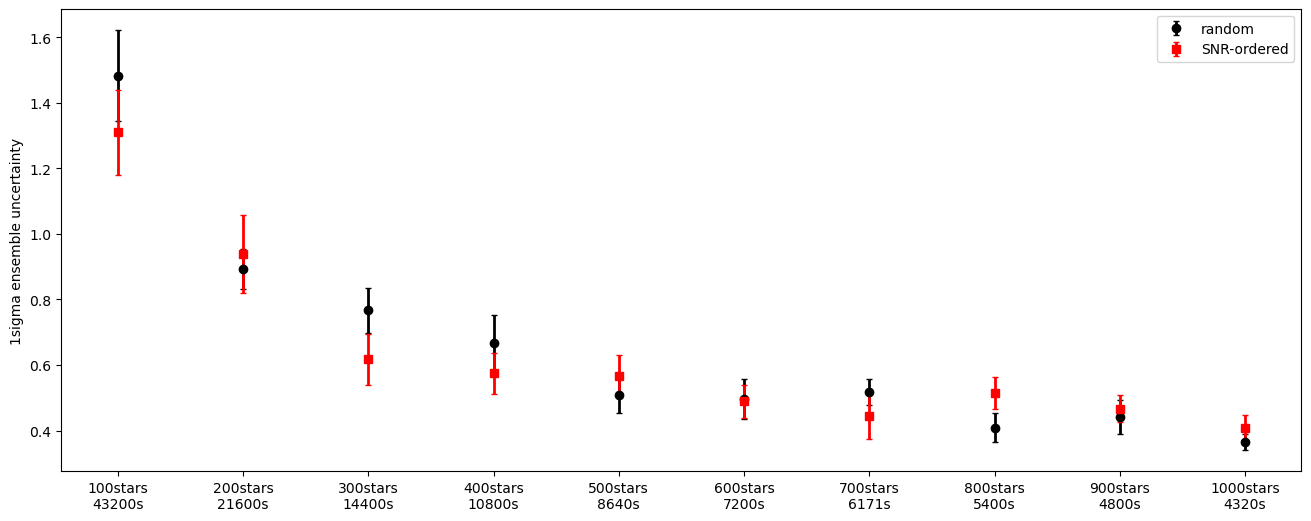

In [106]:
from scipy.stats import bootstrap

f,a2=plt.subplots(1,figsize=(16,6))
tottime=12*3600

uncert=[]
uncerts=[]

unun=[]
ununs=[]

for no in nframes:
    sigfile=np.loadtxt(f"dracotest/dracotest_1.0_IMACS_{no}.txt").T

    med_sig=sigfile[0]
    
    dis=bootstrap((med_sig,),make_1sig,n_resamples=1000).bootstrap_distribution
    uncert.append(np.mean(dis))
    unun.append(np.std(dis))

    
    sigfiles=np.loadtxt(f"dracotest/dracotest_1.0_IMACS_{no}s.txt").T
    med_sigs=sigfiles[0]

    dis=bootstrap((med_sigs,),make_1sig,n_resamples=1000).bootstrap_distribution
    uncerts.append(np.mean(dis))
    ununs.append(np.std(dis))
    
a2.errorbar(nframes,uncert,yerr=unun,marker='o',color='black',linewidth=0,elinewidth=2,capsize=2,label='random')
a2.errorbar(nframes,uncerts,yerr=ununs,marker='s',color='red',linewidth=0,elinewidth=2,capsize=2,label='SNR-ordered')

#a2.plot(nframes,[(lowers[i]+uppers[i]) for i in range(len(lowers))],marker='o',color='black')
#a2.plot(nframes,[(lowerss[i]+upperss[i]) for i in range(len(lowerss))],marker='s',color='red')

a2.set_xticks(nframes)
a2.set_xticklabels([f"{(j+1)*100}stars\n{tottime/nframes[j]:.0f}s" for j in range(len(nframes))])
a2.set_ylabel('1sigma ensemble uncertainty')
a2.legend()
plt.show()


# Testing for difference between these two cases

We cannot really perform a KS test on dependent variables like this, so a simpler statistic might be just seeing if the difference between each point is consistent with 0. Let us assume that these differences are given by a gaussian centered at zero and see what the best-fit spread is (perfect consistency with 0 would be a 0 spread).

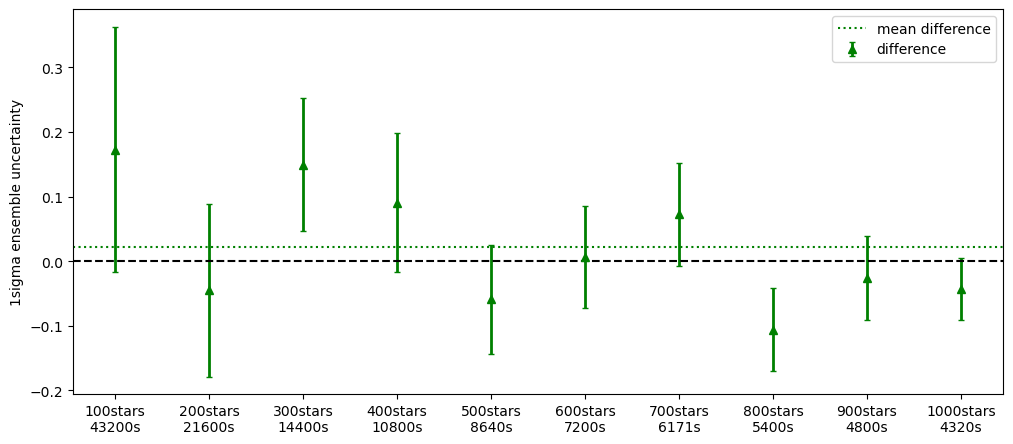

In [156]:
diiff=[uncert[i]-uncerts[i] for i in range(len(nframes))]
diiff_e=[np.sqrt( unun[i]**2+ununs[i]**2) for  i in range(len(nframes))]
f,a2=plt.subplots(1,figsize=(12,5))
tottime=12*3600
a2.errorbar(nframes,diiff,yerr=diiff_e,marker='^',color='green',linewidth=0,elinewidth=2,capsize=2,label='difference')
a2.axhline(0,color='black',linestyle='dashed')
a2.set_xticks(nframes)
a2.set_xticklabels([f"{(j+1)*100}stars\n{tottime/nframes[j]:.0f}s" for j in range(len(nframes))])
a2.set_ylabel('1sigma ensemble uncertainty')
a2.axhline(np.mean(diiff),color='green',linestyle='dotted',label='mean difference')
a2.legend()
plt.show()

In [130]:
spr=np.linspace(0,0.2,10000)

lnLi=[-0.5*np.log(spr**2+diiff_e[i]**2)-0.5*(diiff[i])**2/(spr**2+diiff_e[i]**2) for i in range(len(nframes))]
lnLi=np.array(lnLi)
lnL=np.sum(lnLi,axis=0)
ind=np.unravel_index(lnL.argmax(), lnL.shape)
lnL=lnL-lnL[ind]
print(lnL)
print(spr[ind])

[ 0.00000000e+00 -2.47676795e-08 -9.90708848e-08 ... -5.64328949e+00
 -5.64398622e+00 -5.64468292e+00]
0.0


This is consistent with 0 to a very low spread, so we might conclude that these relations are, on average, the same. Is that very reassuring? I think we have a better intuition looking at the distributions than from doing this test.

# Fitting the Dispersion Uncertainty as a function of number of seperate observations

[-0.56744606  1.394307  ] [0.0316345  0.07316036]
[-0.46569024  1.20183518] [0.04490626 0.09223785]


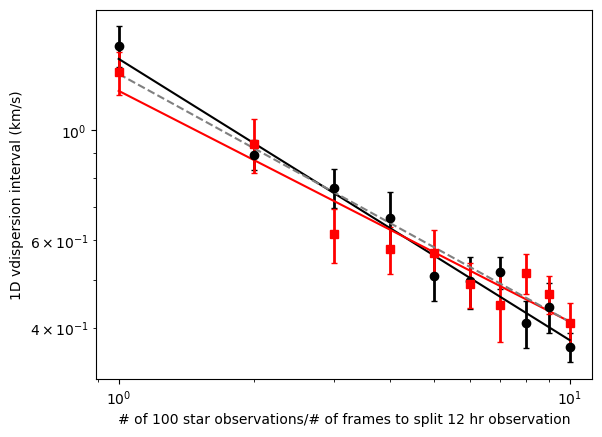

In [154]:
f,a=plt.subplots()
nfra=np.array(nframes)
sigdif=np.array(uncert)
sigdife=np.array(unun)
sigdifs=np.array(uncerts)
sigdifse=np.array(ununs)
a.errorbar(nfra,sigdif,sigdife,color='black',marker='o',label='random',linewidth=0,elinewidth=2,capsize=2)
a.errorbar(nfra,sigdifs,sigdifse,color='red',marker='s',label='SNR-ord',linewidth=0,elinewidth=2,capsize=2)

a.set_xlabel('# of 100 star observations/# of frames to split 12 hr observation')
a.set_ylabel('1D vdispersion interval (km/s)')
a.set_yscale('log')
a.set_xscale('log')

from scipy.optimize import curve_fit

def powerl(x,n,a):
    return a*(x**n)
             
q,qcov=curve_fit(powerl,nfra,sigdif,sigma=sigdife)
qe=np.sqrt(np.diag(qcov))
print(q,qe)
a.plot(nfra,q[1]*(nfra**q[0]),color='black' )

q,qcov=curve_fit(powerl,nfra,sigdifs,sigma=sigdifse)
qe=np.sqrt(np.diag(qcov))
print(q,qe)
a.plot(nfra,q[1]*(nfra**q[0]),color='red' )

a.plot(nfra,1.3*(nfra**-0.5),color='grey' ,linestyle='dashed')

plt.show()

# Will also quickly repeat for the Segue-like galaxy

Again, Segue 1 is a smaller galaxy (less stars) and DEIMOS has a larger systematic velocity (of 2 km/s) so let's see if these things play a difference. We are using a max stars per observation of 40 here.

[2.944928 3.2075   3.45477 ]
0.262572 0.24726999999999988


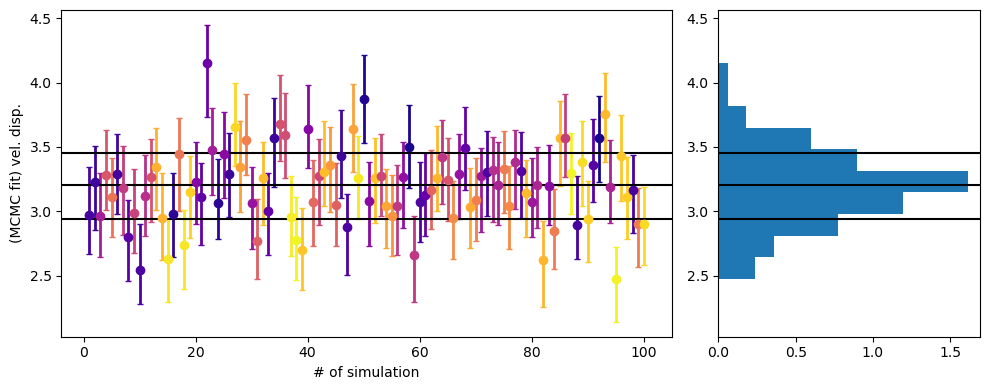

In [13]:
no=4
sigfile=np.loadtxt(f"seguetest/seguetest_2.0_DEIMOS_{no}.txt").T

# median sig # low sig # upper sigma # nstars # observing time
#    0       #.  1.    #.   2.       #. 3.    #.   4

med_sig=sigfile[0]
upp_sig=sigfile[0]-sigfile[1]
low_sig=sigfile[2]-sigfile[0]


f,ax=plt.subplots(1,2,width_ratios=[7, 3],figsize=(10,4))

a=ax[0]
ine=range(len(sigfile[0]))
colors=plt.get_cmap('plasma')
ran=colors(np.random.rand(len(sigfile[0])))
for c in ine:
    a.errorbar([c+1],[med_sig[c]],yerr=[ [low_sig[c]] ,[upp_sig[c]] ],marker='o',linewidth=0,elinewidth=2,color=ran[c],capsize=2)
a.set_xlabel('# of simulation')
a.set_ylabel('(MCMC fit) vel. disp.')

a2=ax[1]


a2.hist(med_sig,density=True,orientation="horizontal")
a2.errorbar(np.zeros(len(med_sig)),med_sig,yerr=[low_sig,upp_sig],alpha=0)
#a2.set_xlabel('1 sigma interval')
linez=np.percentile(med_sig,[15.9,50,84.1])
for l in linez:
    a2.axhline(l,color='black')
    a.axhline(l,color='black')
print(linez)
print(linez[1]-linez[0],linez[2]-linez[1])
plt.tight_layout()
plt.show()

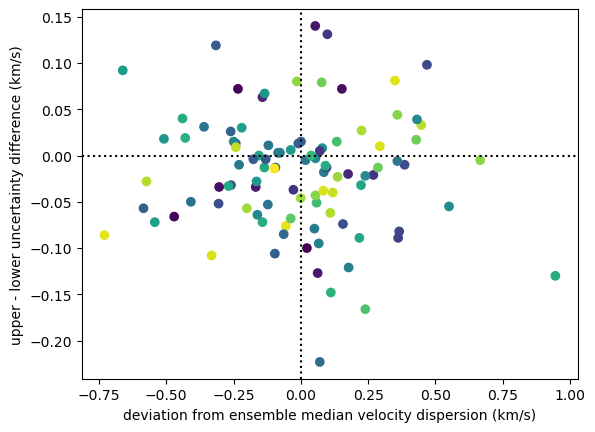

-0.06019951884497454 0.5518657989556053


In [15]:
sub_sig=upp_sig-low_sig
dir_sig=med_sig-np.median(med_sig)

f,a=plt.subplots()
a.axhline(0,linestyle='dotted',color='black')
a.axvline(0,linestyle='dotted',color='black')
a.scatter(dir_sig,sub_sig,marker='o',cmap='viridis',c=np.random.rand(len(dir_sig)))

a.set_xlabel('deviation from ensemble median velocity dispersion (km/s)')
a.set_ylabel('upper - lower uncertainty difference (km/s)')
plt.show()

pr,p_value=st.pearsonr(sub_sig,dir_sig)
print(pr,p_value)

# insignificant, uncorrelated

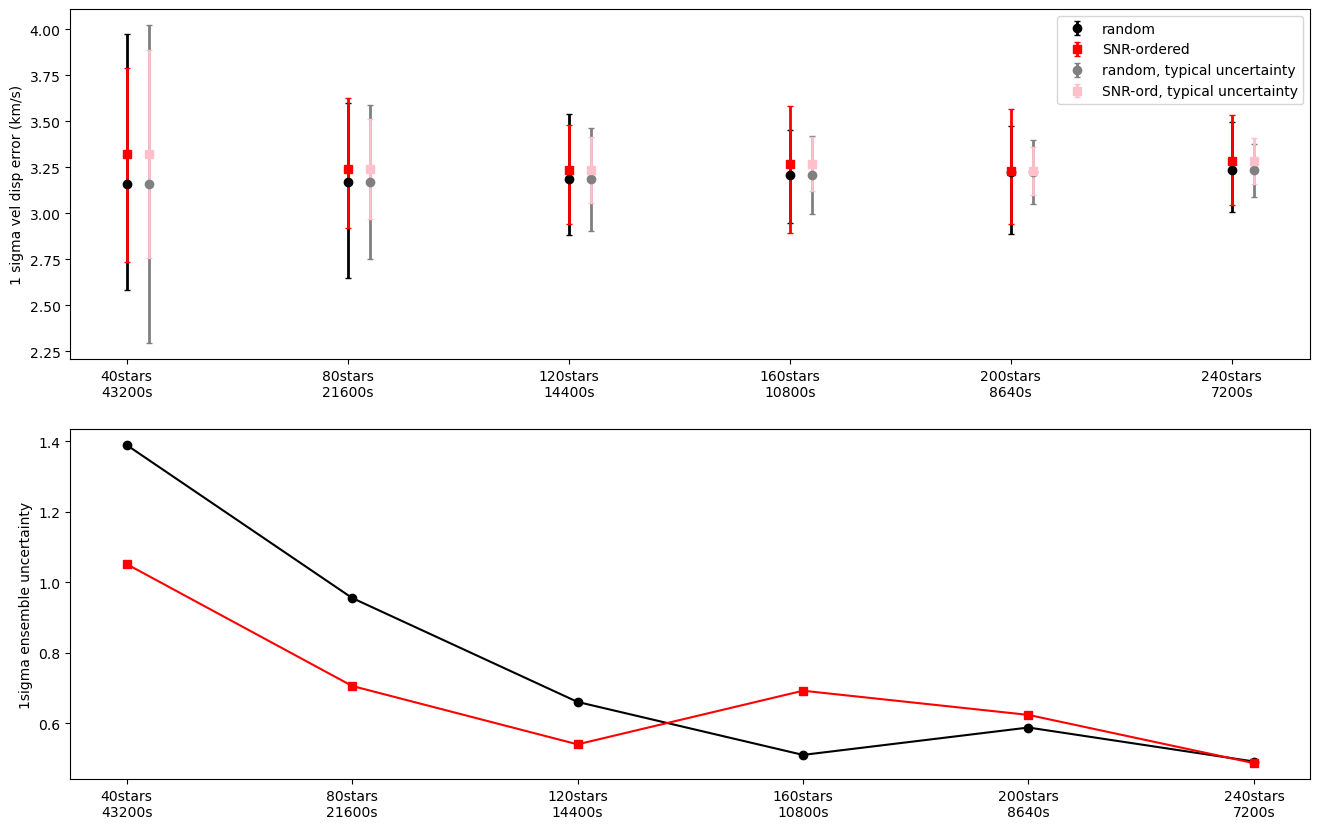

In [16]:
median=[]
lowers=[]
uppers=[]

medians=[]
lowerss=[]
upperss=[]

typic=[]
typics=[]
nframes=[1,2,3,4,5,6]

for no in nframes:
    sigfile=np.loadtxt(f"seguetest/seguetest_2.0_DEIMOS_{no}.txt").T

    med_sig=sigfile[0]
    upp_sig=sigfile[0]-sigfile[1]
    low_sig=sigfile[2]-sigfile[0]

    linez=np.percentile(med_sig,[15.9,50,84.1])
    median.append(linez[1])
    lowers.append(linez[1]-linez[0])
    uppers.append(linez[2]-linez[1])
    typic.append(np.mean(np.mean(upp_sig**2+low_sig**2) ))
    
    sigfiles=np.loadtxt(f"seguetest/seguetest_2.0_DEIMOS_{no}s.txt").T

    med_sigs=sigfiles[0]
    upp_sigs=sigfiles[0]-sigfiles[1]
    low_sigs=sigfiles[2]-sigfiles[0]


    linezs=np.percentile(med_sigs,[15.9,50,84.1])
    medians.append(linezs[1])
    lowerss.append(linezs[1]-linezs[0])
    upperss.append(linezs[2]-linezs[1])
    typics.append(np.mean(np.mean(upp_sigs**2+low_sigs**2) ))

f,az=plt.subplots(2,figsize=(16,10))
a=az[0]
tottime=12*3600

a.set_xticks(nframes)
#a.axhline(0,linestyle='dotted',color='black')
#a.fill_between(nframes,[0 for i in sg_lwe],sg_sigdif,alpha=0.5)
a.errorbar(nframes,median,yerr=[lowers,uppers],marker='o',color='black',linewidth=0,elinewidth=2,capsize=2,label='random')
a.errorbar(nframes,medians,yerr=[lowerss,upperss],marker='s',color='red',linewidth=0,elinewidth=2,capsize=2,label='SNR-ordered')

typ=[n+0.1 for n in nframes]
a.errorbar(typ,median,yerr=typic,marker='o',color='grey',linewidth=0,elinewidth=2,capsize=2,label='random, typical uncertainty')
a.errorbar(typ,medians,yerr=typics,marker='s',color='pink',linewidth=0,elinewidth=2,capsize=2,label='SNR-ord, typical uncertainty')


#a.fill_between(nframes,[-i for i in sg_lwe],sg_upe,alpha=0.5)
a.set_ylabel("1 sigma vel disp error (km/s)")
a.set_xticklabels([f"{(j+1)*40}stars\n{tottime/nframes[j]:.0f}s" for j in range(len(nframes))])

a2=az[1]
a2.plot(nframes,[(lowers[i]+uppers[i]) for i in range(len(lowers))],marker='o',color='black')
a2.plot(nframes,[(lowerss[i]+upperss[i]) for i in range(len(lowerss))],marker='s',color='red')
a2.set_xticks(nframes)
a2.set_xticklabels([f"{nframes[j]*40}stars\n{tottime/nframes[j]:.0f}s" for j in range(len(nframes))])
a2.set_ylabel('1sigma ensemble uncertainty')
a.legend()
plt.show()

# Bootstrapping the data to get uncertainties

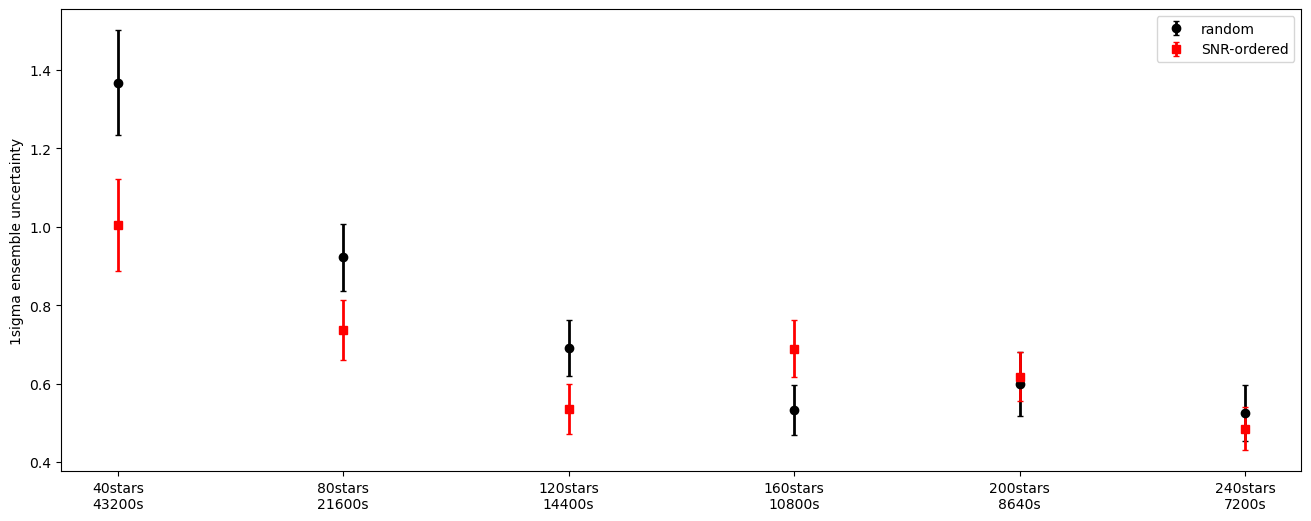

In [17]:
from scipy.stats import bootstrap

def make_1sig(sample):
    linezs=np.percentile(sample,[15.9,84.1])
    return linezs[1]-linezs[0]

f,a2=plt.subplots(1,figsize=(16,6))
tottime=12*3600

uncert=[]
uncerts=[]

unun=[]
ununs=[]

for no in nframes:
    sigfile=np.loadtxt(f"seguetest/seguetest_2.0_DEIMOS_{no}.txt").T

    med_sig=sigfile[0]
    
    dis=bootstrap((med_sig,),make_1sig,n_resamples=1000).bootstrap_distribution
    uncert.append(np.mean(dis))
    unun.append(np.std(dis))

    
    sigfiles=np.loadtxt(f"seguetest/seguetest_2.0_DEIMOS_{no}s.txt").T
    med_sigs=sigfiles[0]

    dis=bootstrap((med_sigs,),make_1sig,n_resamples=1000).bootstrap_distribution
    uncerts.append(np.mean(dis))
    ununs.append(np.std(dis))
    
a2.errorbar(nframes,uncert,yerr=unun,marker='o',color='black',linewidth=0,elinewidth=2,capsize=2,label='random')
a2.errorbar(nframes,uncerts,yerr=ununs,marker='s',color='red',linewidth=0,elinewidth=2,capsize=2,label='SNR-ordered')

#a2.plot(nframes,[(lowers[i]+uppers[i]) for i in range(len(lowers))],marker='o',color='black')
#a2.plot(nframes,[(lowerss[i]+upperss[i]) for i in range(len(lowerss))],marker='s',color='red')

a2.set_xticks(nframes)
a2.set_xticklabels([f"{nframes[j]*40}stars\n{tottime/nframes[j]:.0f}s" for j in range(len(nframes))])
a2.set_ylabel('1sigma ensemble uncertainty')
a2.legend()
plt.show()

Visually, it would seem that these might actually be different curves from each other and specifically, that SNR ordering might make a difference when we have fewer points.

# Conclusion

We get an uncertainty measurement from observing that is of a similar magnitude and behavior to the uncertainty from fitting. This inflates our uncertainty from fitting by around a factor of $\sqrt{2}$. Both decrease with increasing numbers of points.

This is sort of a spin off of the research I am doing with Alex. I don't necessarily think this thought experiment is specific enough to confront the question we are interested in because we are forced to measure all the stars for the same amount of time (way the code is written right now). If I have 49 stars in my Deimos measurement, it's not sensible to ask whether I should measure 40 or 80 stars. The question then becomes should I spend 12 hours on the 40 stars, or 10 hours on the 40 stars, and 2 hours on the 9 stars+some of the first 40 over again. At minimum, this test suggested that there is a difference when you order by SNR, so bright stars should be prioritized for more time, if a direct choice needs 